In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# plt.style.use("seaborn")
sns.set_context("poster")

In [35]:
dfs = []
for csv_file in Path("report_results").glob("*.csv"):
    df = pd.read_csv(csv_file)
    dfs.append(df)

input_df = pd.concat(dfs)
input_df["length_bucket"] = pd.cut(
    input_df["example_length"],
    bins=[0, 10, 20, 30, np.inf],
    labels=["0-9", "10-19", "20-29", "30+"]
)
input_df["model"] = input_df["model"].replace({
    "PTDeepCBOW": "DeepCBOW (PT)",
    "BinaryTreeLSTMClassifier": "Tree LSTM (Bi)",
    "BinarySubtreeLSTMClassifier": "Tree LSTM (BiN)",
    "ChildSumTreeLSTMClassifier": "Tree LSTM (CS)",
    "LSTMClassifier": "LSTM",
    "LSTMClassifier_MiniBatch": "LSTM (MB)",
    "LSTMClassifier_FineTune": "LSTM (MB FT)",
})

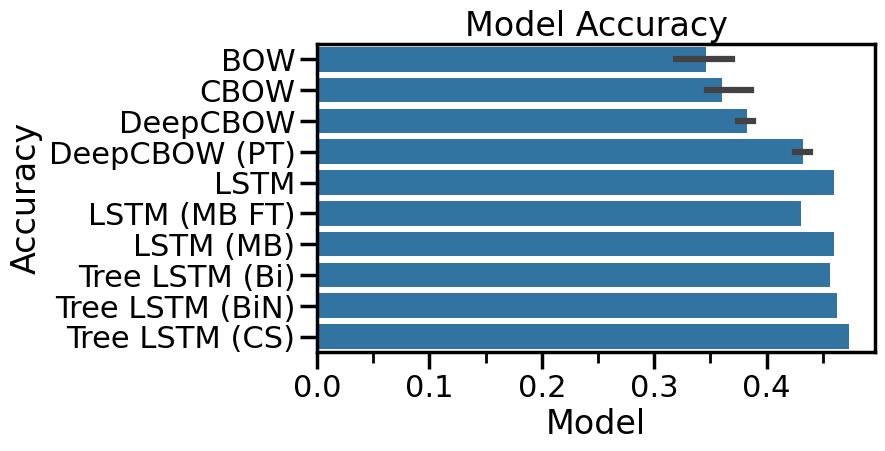

In [36]:
plotting_df = input_df.groupby(["model", "timestamp"])["correct"].mean().reset_index()

fig, ax = plt.subplots(figsize=(7.2, 4))

sns.barplot(plotting_df, y="model", x="correct", ax=ax)

ax.set_title("Model Accuracy")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Model")

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))

fig.savefig("plots/model_accuracy.png", bbox_inches="tight")

/tmp/ipykernel_283707/3616176485.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plotting_df = input_df.groupby(["model", "timestamp", "length_bucket"])["correct"].mean().reset_index()


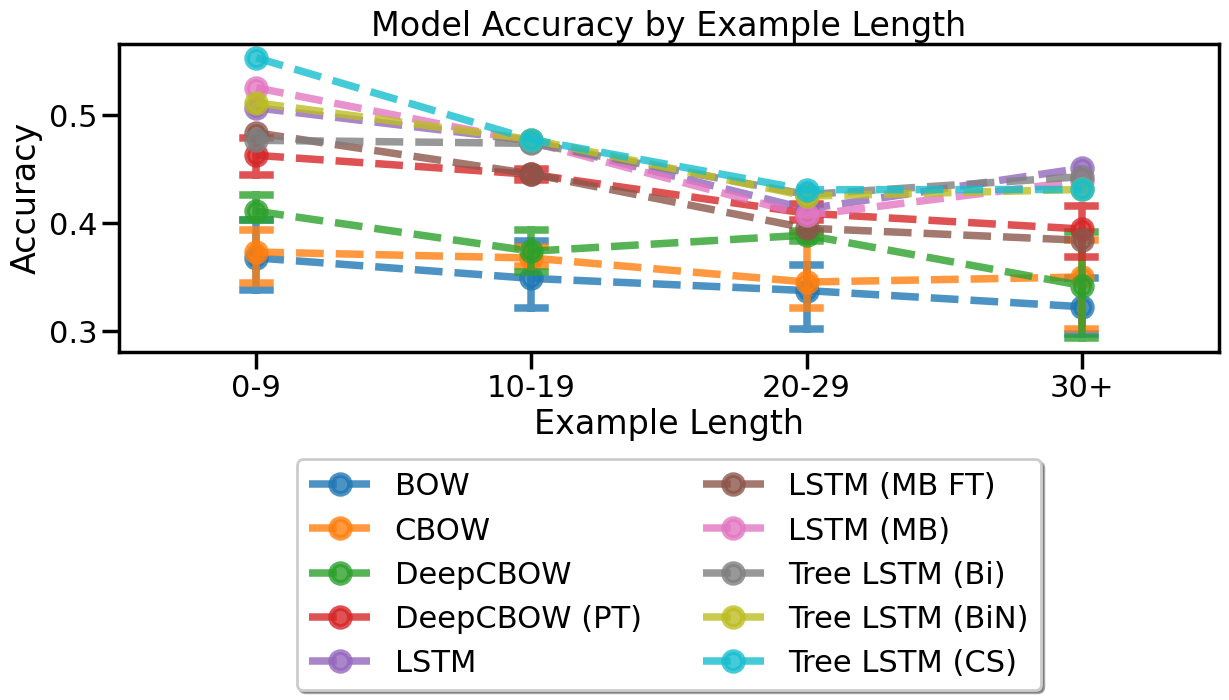

In [37]:
fig, ax = plt.subplots(figsize=(14.2, 4))

plotting_df = input_df.groupby(["model", "timestamp", "length_bucket"])["correct"].mean().reset_index()
sns.pointplot(
    data=plotting_df,
    x="length_bucket",
    y="correct",
    markers='o',
    capsize=0.1,
    linestyles="--",
    hue="model",
    alpha=0.8
)

ax.set_title("Model Accuracy by Example Length")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Example Length")

# Place legend below the plot horizontally
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=2)

fig.savefig("plots/acc_vs_length.png", bbox_inches="tight")

/tmp/ipykernel_283707/1758624237.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plotting_df = input_df.groupby(["model", "timestamp", "length_bucket"])["correct"].mean().reset_index()


Text(0, 0.5, 'Accuracy')

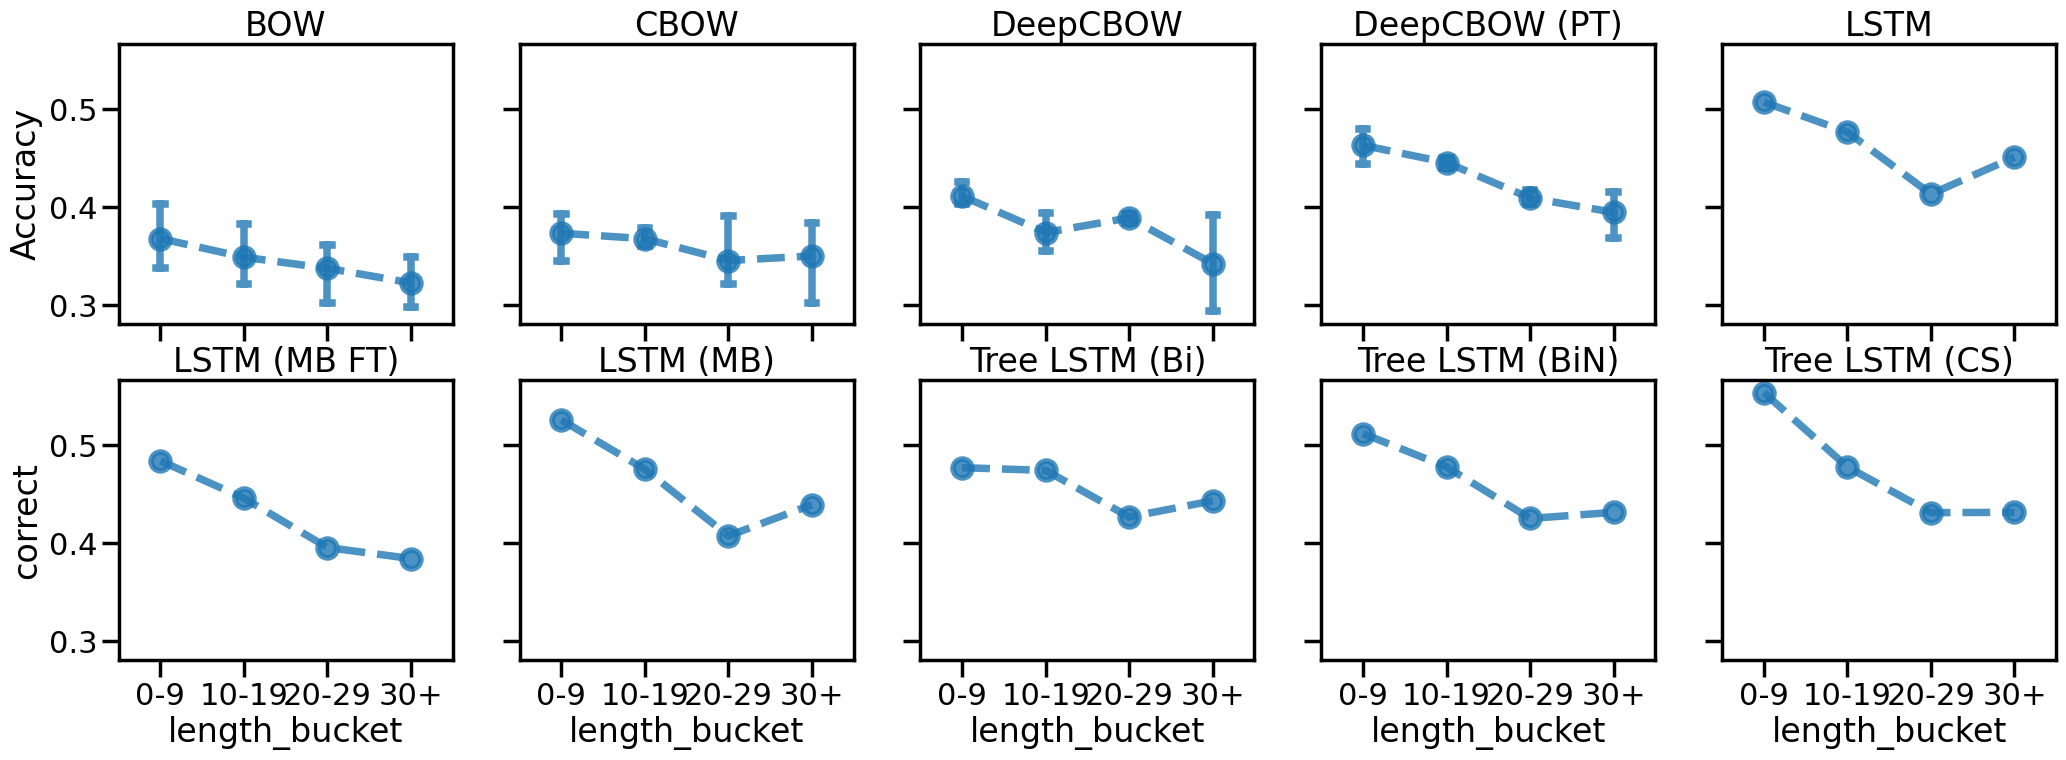

In [38]:
fig, ax = plt.subplots(figsize=(25, 8), ncols=5, nrows=2, sharey=True, sharex=True)
ax = ax.flatten()  # Flatten the 2D array of axes for easy indexing

plotting_df = input_df.groupby(["model", "timestamp", "length_bucket"])["correct"].mean().reset_index()

for idx, model in enumerate(plotting_df["model"].unique()):

    sns.pointplot(
        data=plotting_df[plotting_df["model"] == model],
        x="length_bucket",
        y="correct",
        markers='o',
        capsize=0.1,
        linestyles="--",
        # hue="model",
        alpha=0.8,
        ax=ax[idx]
    )
    ax[idx].set_title(f"{model}")

ax[0].set_ylabel("Accuracy")

In [39]:
plotting_df = input_df.groupby(["model", "length_bucket"])["correct"].mean().reset_index()
pivot_df = plotting_df.pivot(index='model', columns='length_bucket', values='correct')

percentage_drop_df = pivot_df.apply(lambda row: (row - row.max()) / row.max() * 100, axis=1)

latex_table = percentage_drop_df.to_latex(
    float_format="%.1f",
    bold_rows=True,
    caption="Percentage drop of accuracy using the bucket of best performance as a baseline. All the reported numbers in the table are percentages, and the numbers in bold correspond to the largest drop in performance for each model.",
    label="tab:acc_drop_vs_length"
)

print(latex_table)

\begin{table}
\caption{Percentage drop of accuracy using the bucket of best performance as a baseline. All the reported numbers in the table are percentages, and the numbers in bold correspond to the largest drop in performance for each model.}
\label{tab:acc_drop_vs_length}
\begin{tabular}{lrrrr}
\toprule
length_bucket & 0-9 & 10-19 & 20-29 & 30+ \\
model &  &  &  &  \\
\midrule
\textbf{BOW} & 0.0 & -5.2 & -8.2 & -12.3 \\
\textbf{CBOW} & 0.0 & -1.5 & -7.4 & -6.2 \\
\textbf{DeepCBOW} & 0.0 & -9.0 & -5.4 & -16.7 \\
\textbf{DeepCBOW (PT)} & 0.0 & -3.8 & -11.6 & -14.7 \\
\textbf{LSTM} & 0.0 & -6.0 & -18.5 & -11.0 \\
\textbf{LSTM (MB FT)} & 0.0 & -7.9 & -18.2 & -20.6 \\
\textbf{LSTM (MB)} & 0.0 & -9.6 & -22.5 & -16.4 \\
\textbf{Tree LSTM (Bi)} & 0.0 & -0.6 & -10.5 & -7.1 \\
\textbf{Tree LSTM (BiN)} & 0.0 & -6.6 & -16.9 & -15.7 \\
\textbf{Tree LSTM (CS)} & 0.0 & -13.7 & -22.1 & -22.0 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_283707/2116841605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plotting_df = input_df.groupby(["model", "length_bucket"])["correct"].mean().reset_index()
